In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Select the relevant columns
df_selected = df[['GrLivArea', 'YearBuilt', 'SalePrice']]

# Display the first few rows to verify the selection
print(df_selected.head())


   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


C:\Users\Mercy\AppData\Local\Temp\ipykernel_13060\1693016005.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


Mean Squared Error (MSE): 2495554898.6683216


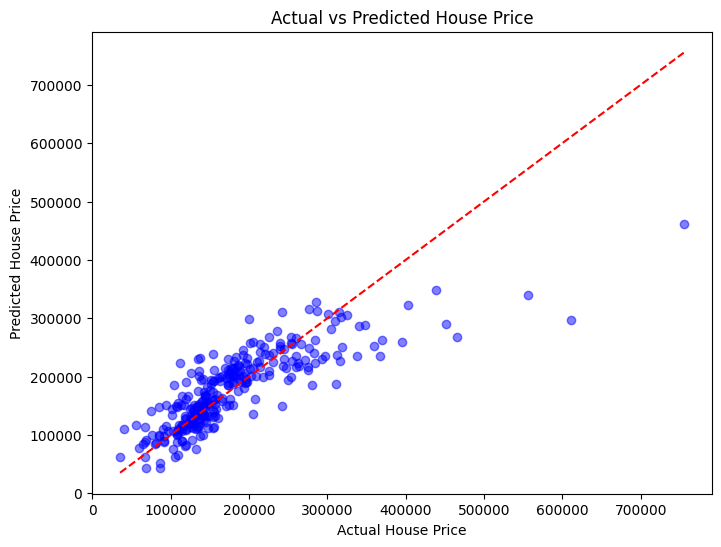

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('train.csv')

# Select relevant columns
df_selected = df[['GrLivArea', 'YearBuilt', 'SalePrice']]

# Step 2: Preprocess the data (remove rows with missing values)
df_selected.dropna(inplace=True)

# Step 3: Split the data into features and target
X = df_selected[['GrLivArea', 'YearBuilt']]  # Features
y = df_selected['SalePrice']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Step 7: Visualize the actual vs predicted house prices
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Plot line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Price')
plt.show()


C:\Users\Mercy\AppData\Local\Temp\ipykernel_13060\353946427.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


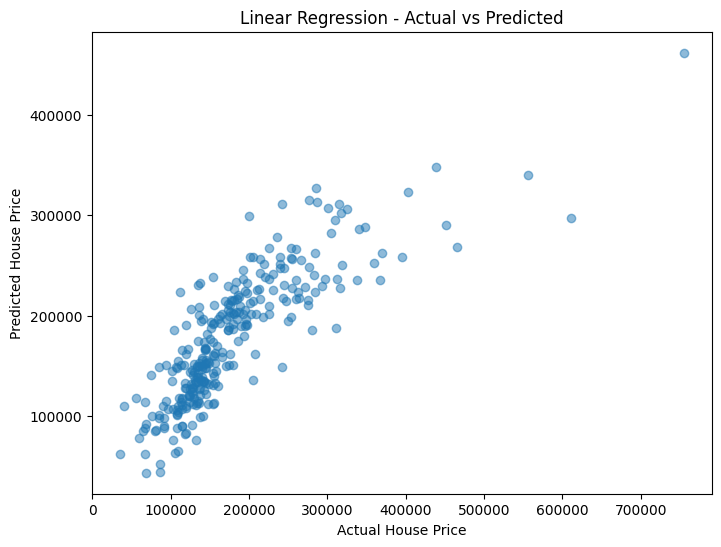

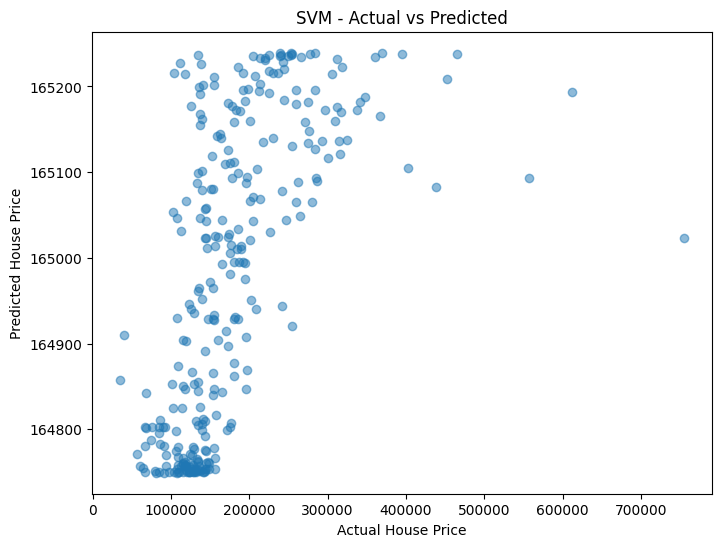

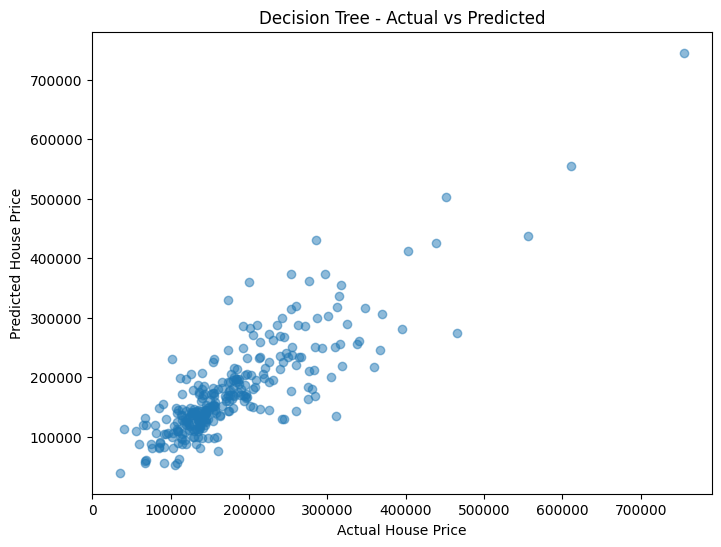

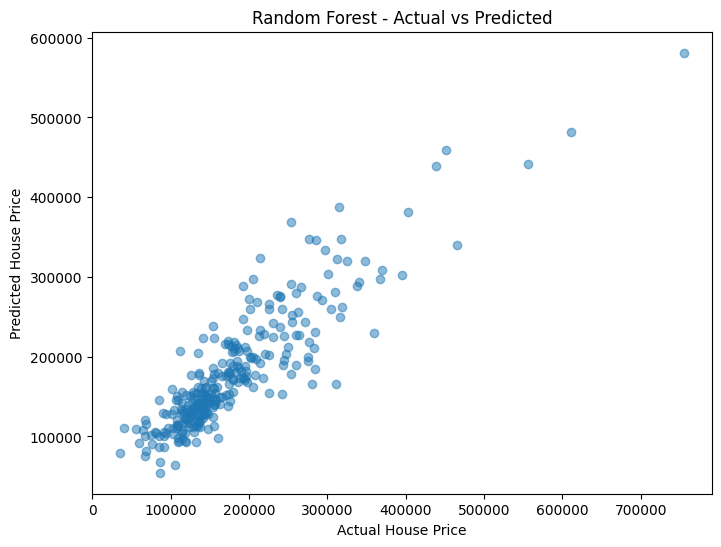

               Model  Mean Squared Error
0  Linear Regression        2.495555e+09
1                SVM        7.844111e+09
2      Decision Tree        2.211018e+09
3      Random Forest        1.577470e+09


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('train.csv')

# Select relevant columns
df_selected = df[['GrLivArea', 'YearBuilt', 'SalePrice']]

# Preprocess the data (remove rows with missing values)
df_selected.dropna(inplace=True)

# Step 2: Split the data into features and target
X = df_selected[['GrLivArea', 'YearBuilt']]  # Features
y = df_selected['SalePrice']  # Target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Step 4: Train, Estimate, and Evaluate Models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    results[name] = mse
    
    # Visualize the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label=f'{name}')
    plt.xlabel('Actual House Price')
    plt.ylabel('Predicted House Price')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()

# Step 5: Summarize the results in a table
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Squared Error'])
print(results_df)


C:\Users\Mercy\AppData\Local\Temp\ipykernel_13060\1531757296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_extended.dropna(inplace=True)


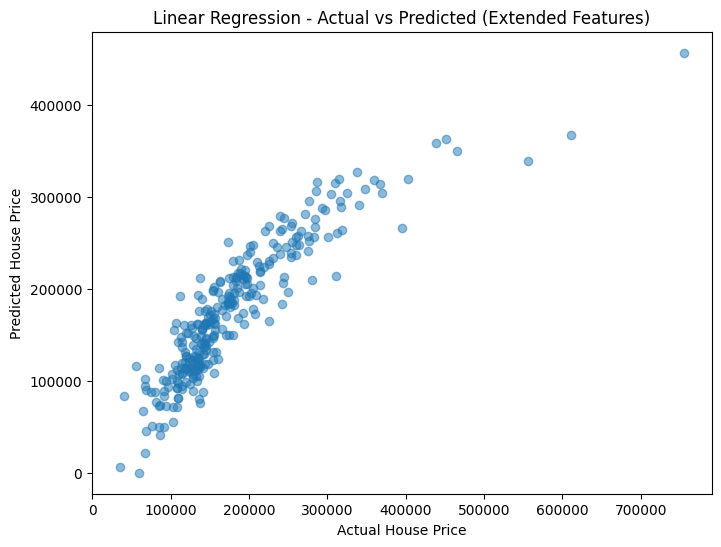

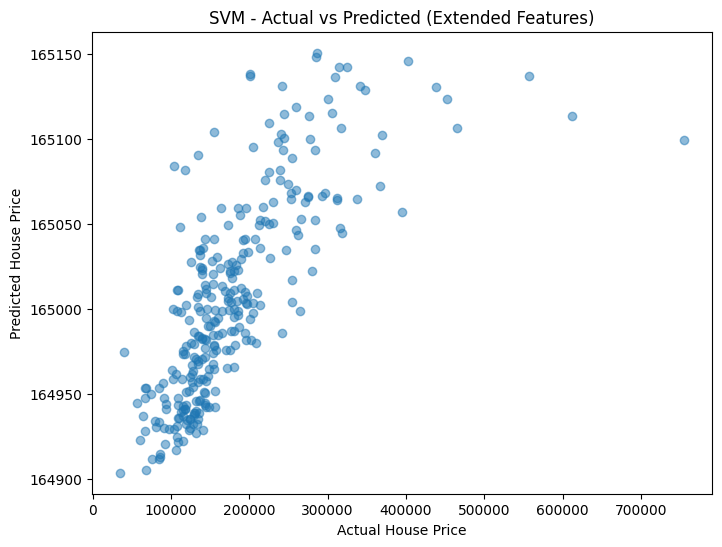

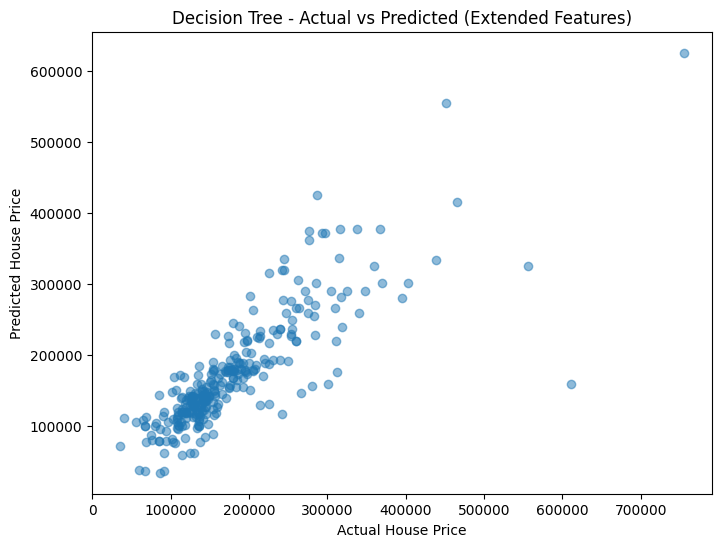

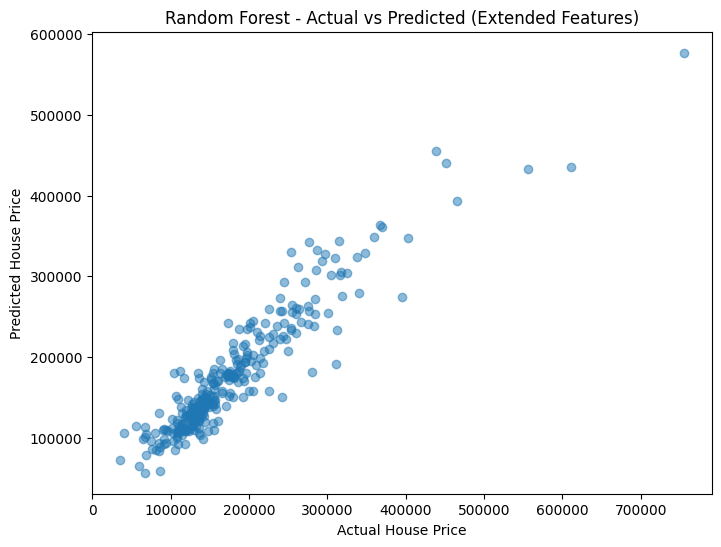

               Model  Mean Squared Error
0  Linear Regression        1.597013e+09
1                SVM        7.853937e+09
2      Decision Tree        2.454996e+09
3      Random Forest        9.972633e+08


In [4]:
# Step 1: Select additional features
df_selected_extended = df[['GrLivArea', 'YearBuilt', 'SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1']]

# Step 2: Handle missing data
df_selected_extended.dropna(inplace=True)

# Step 3: Split the data into features and target
X_extended = df_selected_extended[['GrLivArea', 'YearBuilt', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1']]  # Features
y_extended = df_selected_extended['SalePrice']  # Target

# Step 4: Split into training and testing sets (80% train, 20% test)
X_train_extended, X_test_extended, y_train_extended, y_test_extended = train_test_split(X_extended, y_extended, test_size=0.2, random_state=42)

# Step 5: Define the models
models_extended = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Step 6: Train, Estimate, and Evaluate Models
results_extended = {}
for name, model in models_extended.items():
    # Train the model
    model.fit(X_train_extended, y_train_extended)
    
    # Make predictions
    y_pred_extended = model.predict(X_test_extended)
    
    # Calculate Mean Squared Error
    mse_extended = mean_squared_error(y_test_extended, y_pred_extended)
    
    # Store results
    results_extended[name] = mse_extended
    
    # Visualize the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_extended, y_pred_extended, alpha=0.5, label=f'{name}')
    plt.xlabel('Actual House Price')
    plt.ylabel('Predicted House Price')
    plt.title(f'{name} - Actual vs Predicted (Extended Features)')
    plt.show()

# Step 7: Summarize the results in a table
results_df_extended = pd.DataFrame(list(results_extended.items()), columns=['Model', 'Mean Squared Error'])
print(results_df_extended)
